## data frame__

In [2]:
import pandas as pd 
import pylab as pl
pd.set_option('display.max_columns',None) 
import warnings
warnings.simplefilter("ignore")

cc_df = pd.read_csv('CreditCard.csv') 
cc_df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


## data preparation__

In [3]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [4]:
i = ['Income_type', 'Education_type', 'Family_status', 'Housing_type','Target', 'Occupation_type'] 
for j in i:
    print(j)
    print(cc_df[j].value_counts())
    print('\n')

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: Income_type, dtype: int64


Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: Education_type, dtype: int64


Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: Family_status, dtype: int64


Housing_type
House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: Housing_type, dtype: int64


Target
0    8426
1    1283
Name: Target, dtype: int64


Occupation_type
Other                    2994
Laborers                 1724
Sales staff             

### feature encoding__

In [5]:
obj_cols = ['Income_type', 'Education_type', 'Family_status', 'Housing_type']
OneHot = pd.get_dummies(cc_df, columns=obj_cols)

df = OneHot.drop(columns = ['ID', 'Occupation_type'])

### outliers__

In [6]:
for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    LowerBound = Q1 - 1.5 * IQR
    UpperBound = Q3 + 1.5 * IQR
    new_df = df[(df[i] >= LowerBound)|(df[i] <= UpperBound)]
    
new_df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target,Income_type_Commercial associate,Income_type_Pensioner,Income_type_State servant,Income_type_Student,Income_type_Working,Education_type_Academic degree,Education_type_Higher education,Education_type_Incomplete higher,Education_type_Lower secondary,Education_type_Secondary / secondary special,Family_status_Civil marriage,Family_status_Married,Family_status_Separated,Family_status_Single / not married,Family_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


## solving imbalanced data target__

In [7]:
X = new_df.drop(columns=['Target'])
y = new_df['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

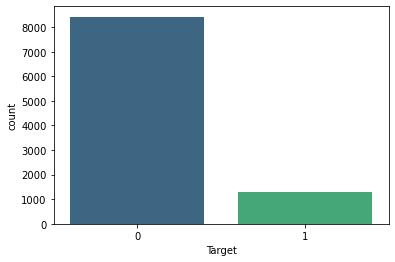

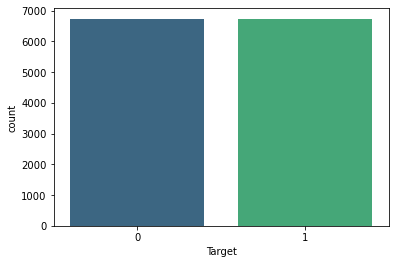

In [8]:
from imblearn.over_sampling import SMOTE 
oversample = SMOTE(k_neighbors = 2) 
X_train1, y_train1 = oversample.fit_resample(X_train, y_train) 

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y, palette = 'viridis') 
plt.show() 

sns.countplot(y_train1, palette = 'viridis') 
plt.show() 

## feature selection__

In [9]:
import statsmodels.api as sm 

def backward_regression(X, y,
                           initial_list =[ ], 
                           threshold_in = 0.01, 
                           threshold_out = 0.05, 
                           verbose = True):
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        if not changed:
            break
    return included

backward_regression(X_train1, y_train1)

['Gender',
 'Own_car',
 'Own_property',
 'Work_phone',
 'Phone',
 'Email',
 'Unemployed',
 'Num_children',
 'Account_length',
 'Total_income',
 'Age',
 'Years_employed',
 'Income_type_Commercial associate',
 'Income_type_Pensioner',
 'Income_type_State servant',
 'Income_type_Working',
 'Education_type_Higher education',
 'Education_type_Incomplete higher',
 'Education_type_Lower secondary',
 'Education_type_Secondary / secondary special',
 'Family_status_Civil marriage',
 'Family_status_Married',
 'Family_status_Separated',
 'Family_status_Single / not married',
 'Family_status_Widow',
 'Housing_type_Co-op apartment',
 'Housing_type_House / apartment',
 'Housing_type_Municipal apartment',
 'Housing_type_Office apartment',
 'Housing_type_Rented apartment',
 'Housing_type_With parents']

## data preprocessing__

In [10]:
X = df[backward_regression(X_train1, y_train1)]
y = df[['Target']]

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4) 

In [11]:
from imblearn.over_sampling import SMOTE 
oversample = SMOTE(k_neighbors = 2)
X_train1, y_train1 = oversample.fit_resample(X_train, y_train) 

## feature scaling__

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train1 = sc.fit_transform(X_train1)
X_test = sc.transform(X_test)

## modelling__

In [13]:
from sklearn.linear_model import LogisticRegression 
LR = LogisticRegression(C = 0.8, solver='liblinear').fit(X_train1, y_train1) 

yhat = LR.predict(X_test)

## evaluation__

In [14]:
from sklearn.metrics import classification_report 
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1688
           1       0.43      0.01      0.02       254

    accuracy                           0.87      1942
   macro avg       0.65      0.50      0.48      1942
weighted avg       0.81      0.87      0.81      1942

